In [1]:
import pandas as pd
import numpy as np

In [2]:
taxi_df = pd.read_parquet(r'C:\Users\ASUS\Desktop\texi-analysis\data\yellow_tripdata_2019-01.parquet')
taxi_data=pd.concat([taxi_df])


In [3]:
print(taxi_data.shape)
taxi_data.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [4]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
taxi_data=taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','RatecodeID','PULocationID', 'DOLocationID', 'payment_type','total_amount']]

In [6]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

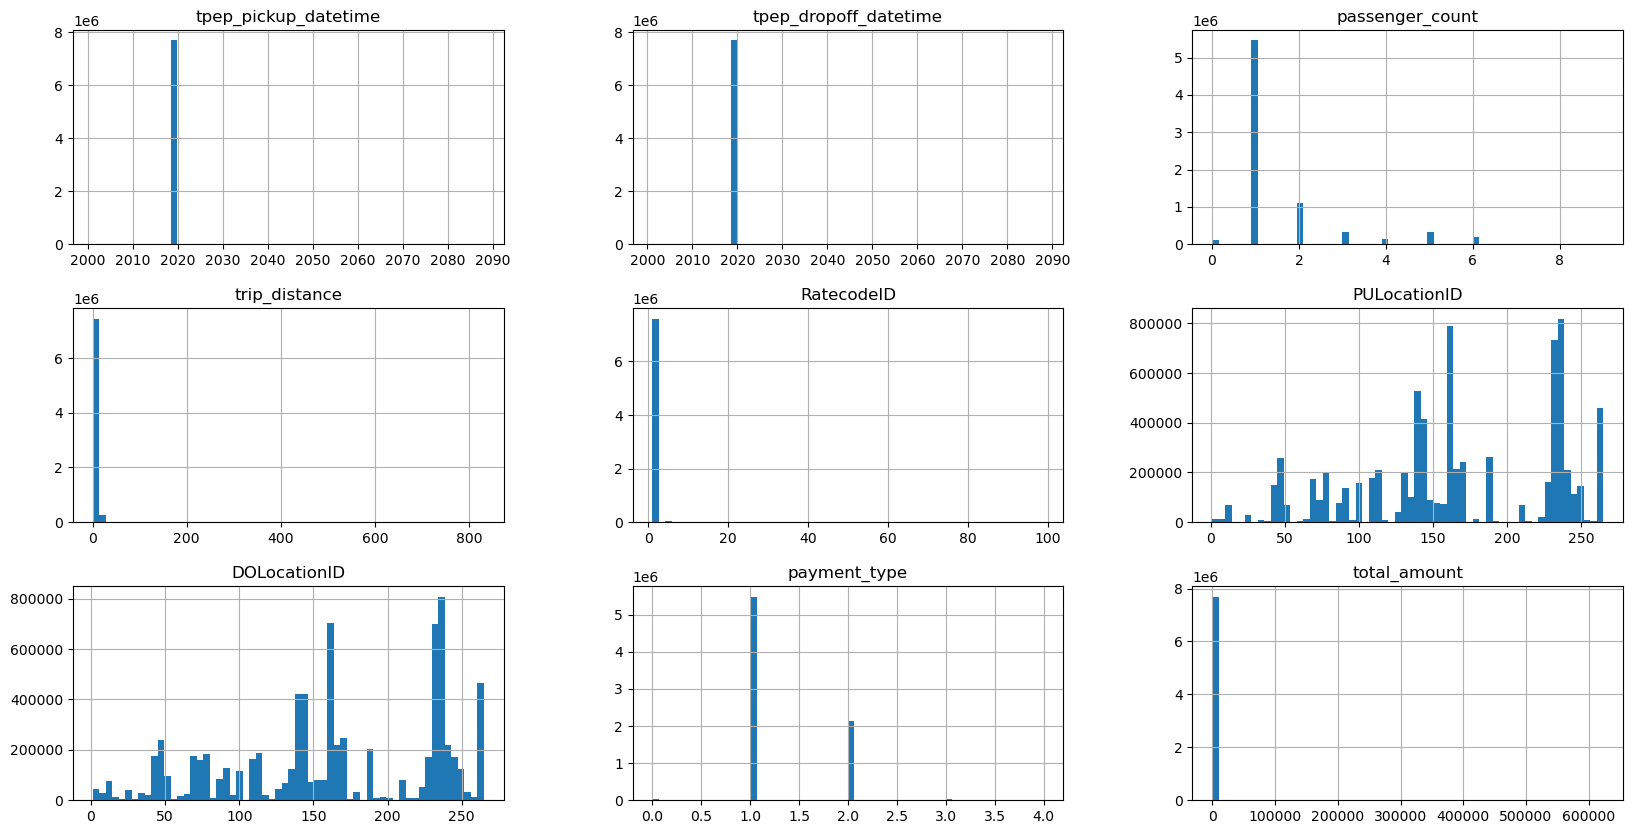

In [7]:
taxi_data.hist(figsize=(20,10),bins=60)

In [8]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

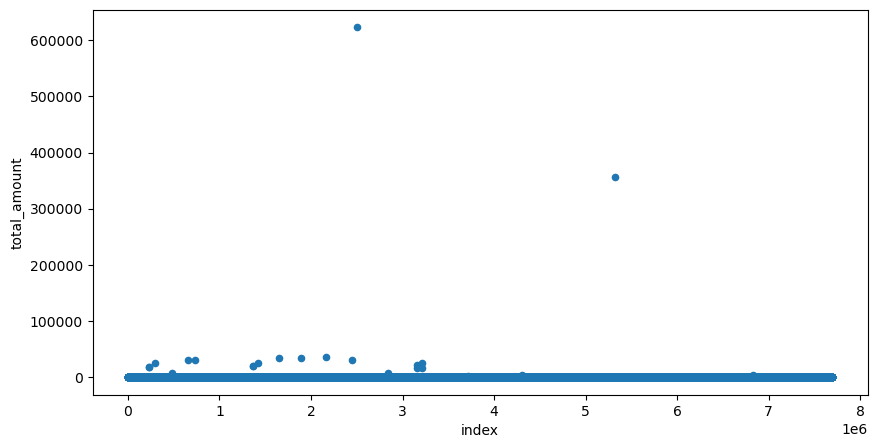

In [9]:
taxi_data.reset_index().plot(kind='scatter' ,x='index',y='total_amount' ,figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

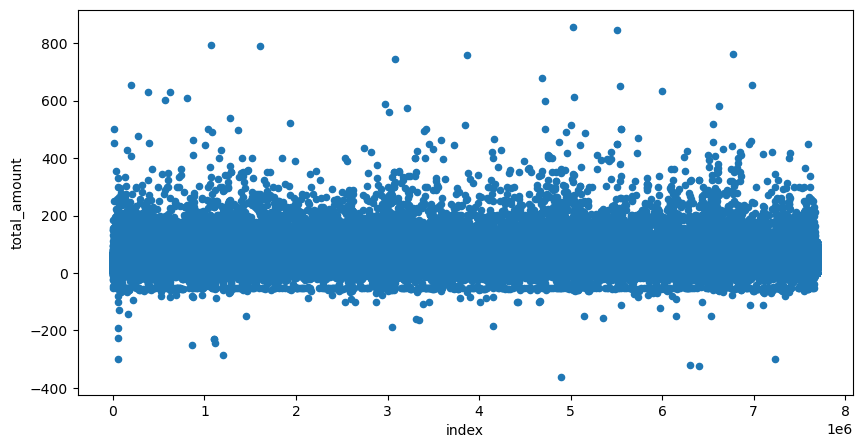

In [10]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter',x='index',y='total_amount',figsize=(10,5))

In [11]:
print(taxi_data[taxi_data['total_amount']<0].shape)

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

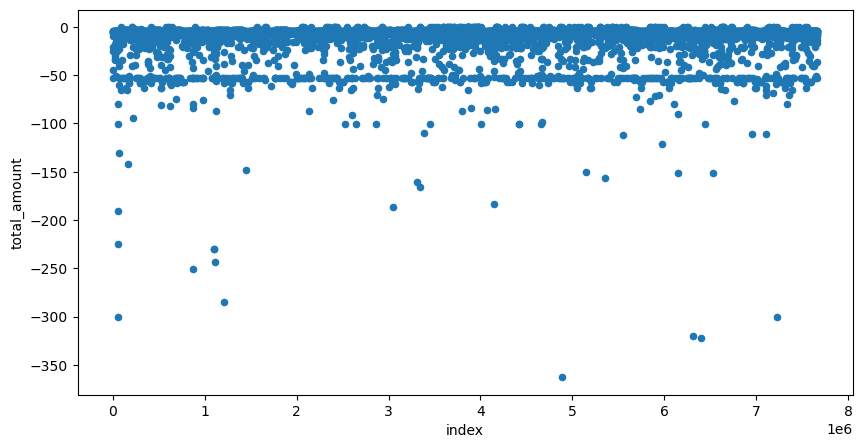

In [12]:
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter',x='index',y='total_amount',figsize=(10,5))

In [13]:
(taxi_data[taxi_data['total_amount']<0].head())

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [14]:
(taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts())

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

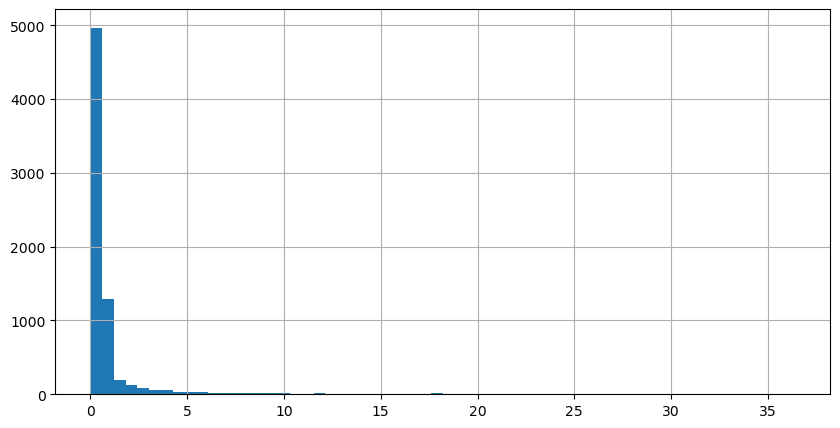

In [15]:
(taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(figsize=(10,5),bins=60))

In [16]:
print(taxi_data[taxi_data['total_amount']==0].shape)

(1643, 9)


In [17]:
(taxi_data[taxi_data['total_amount']==0].head())

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [18]:
(taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts())

payment_type
1    813
2    569
0    231
3     29
4      1
Name: count, dtype: int64

<Axes: >

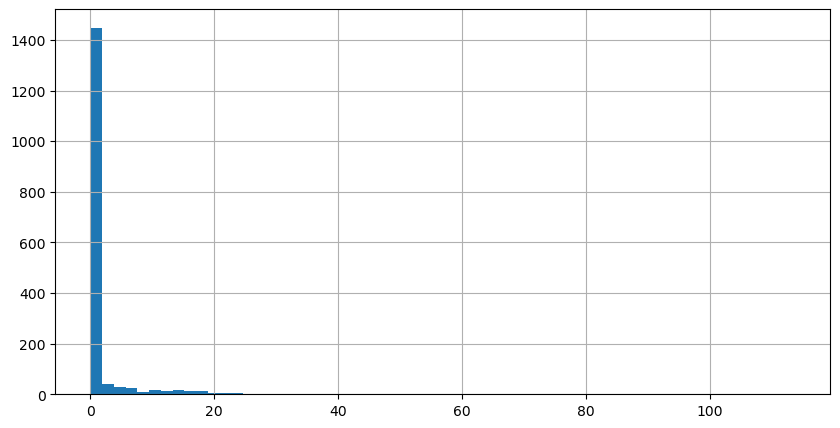

In [19]:
(taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(figsize=(10,5),bins=60))

In [20]:
(taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts())

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

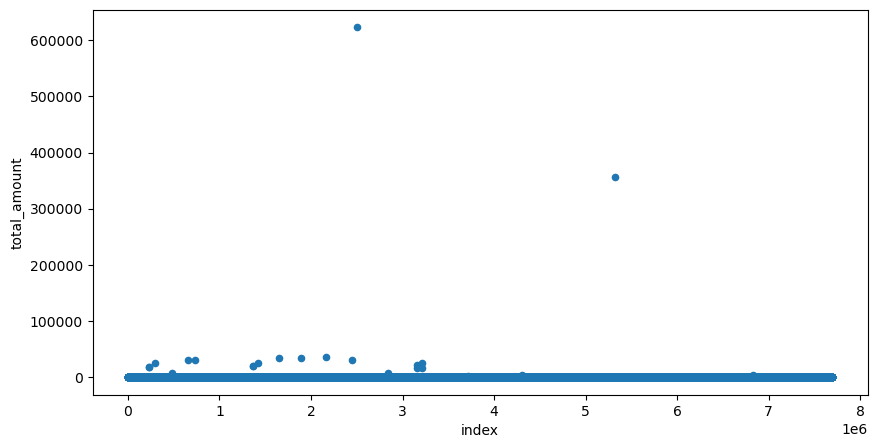

In [21]:
taxi_data.reset_index().plot(kind='scatter' ,x='index',y='total_amount' ,figsize=(10,5))

In [22]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [23]:
taxi_data['total_amount'].mean()

15.810651344610214

In [24]:
taxi_data_filtered=taxi_data[(taxi_data['total_amount']>0) & (taxi_data['total_amount']<200)]

In [25]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7696617, 9)


(7686676, 9)

In [26]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28441
trip_distance                0
RatecodeID               28441
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [27]:
taxi_data_prepared=taxi_data_filtered.copy()

In [28]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [29]:
taxi_data_prepared.loc[:,'RatecodeID']=taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID']=taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID']=taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'payment_type']=taxi_data_prepared['RatecodeID'].astype(str)

In [30]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [31]:
taxi_data_prepared['transaction_date']=pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year']=taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month']=taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day']=taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour']=taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [32]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,1.0,1.0,1.0,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,1.0,1.0,1.0,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,1.0,1.0,1.0,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,1.0,1.0,1.0,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,2.0,2.0,2.0,55.55,2018-11-28,2018,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

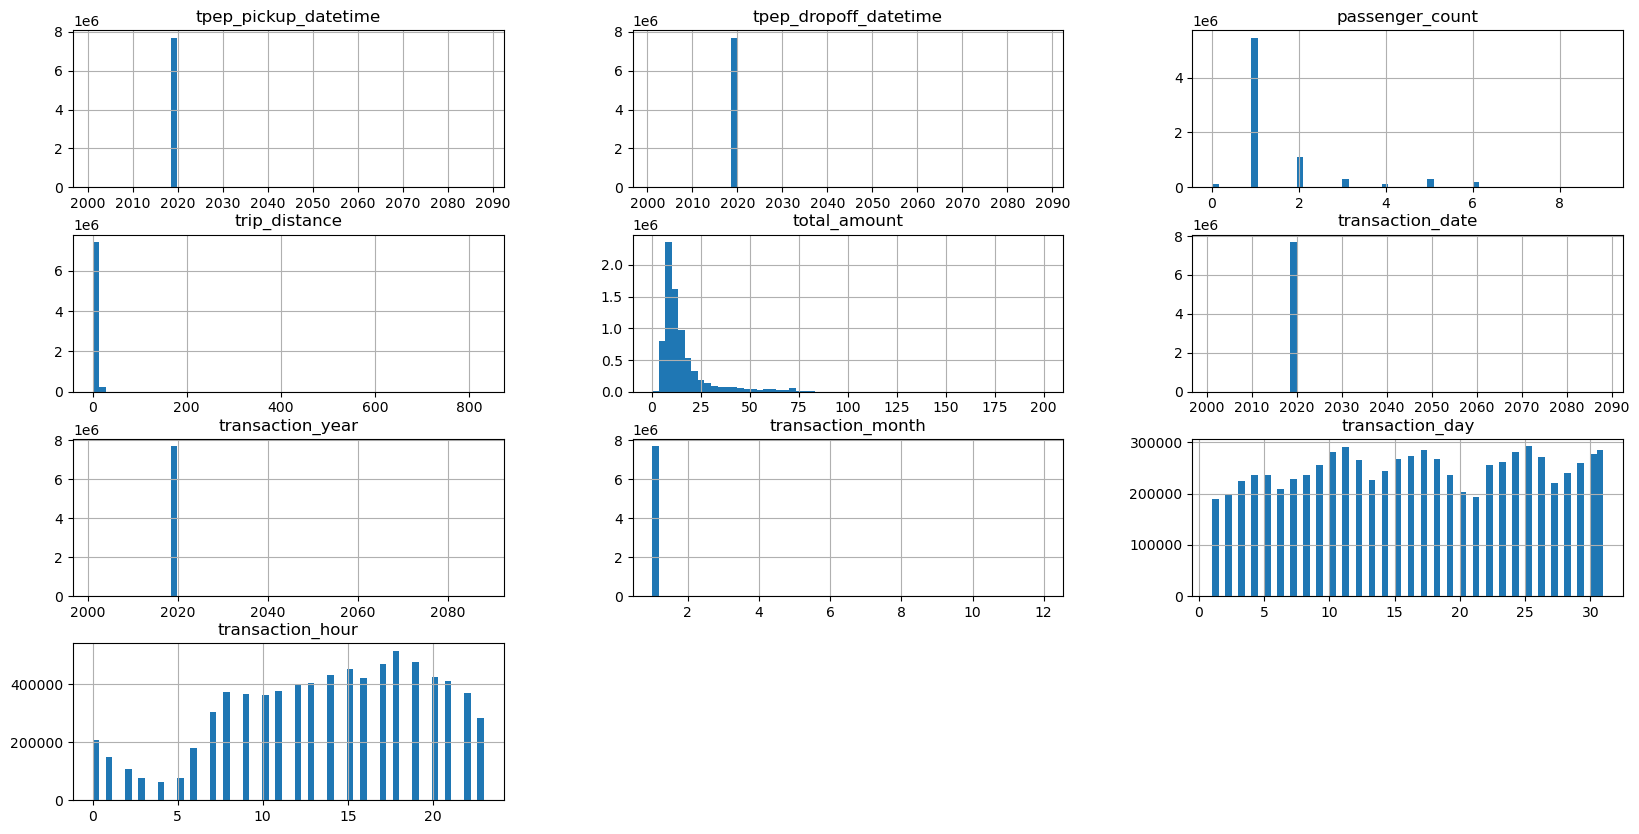

In [33]:
taxi_data_prepared.hist(figsize=(20,10),bins=60)

In [34]:
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

In [35]:
categorical_columns=['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns=['trip_distance','total_amount']
needed_columns= categorical_columns+numerical_columns

In [36]:
main_taxi_df=taxi_data_prepared[needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7686144, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,1.0,2019-01-01,1,1,0,1.5,9.95
1,1.0,2019-01-01,1,1,0,2.6,16.30
7,1.0,2019-01-01,1,1,0,1.3,9.05
8,1.0,2019-01-01,1,1,0,3.7,18.50
9,1.0,2019-01-01,1,1,0,2.1,13.00


In [37]:
taxi_grouped_by_region=main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transaction']=main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(4552, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction
0,1.0,2019-01-01,1,1,0,2.810215,15.501245,13256
1,1.0,2019-01-01,1,1,1,3.008797,15.880940,15258
2,1.0,2019-01-01,1,1,2,3.125909,15.789893,13035
3,1.0,2019-01-01,1,1,3,3.203513,15.493270,10292
4,1.0,2019-01-01,1,1,4,3.535103,16.105968,6686


<Axes: >

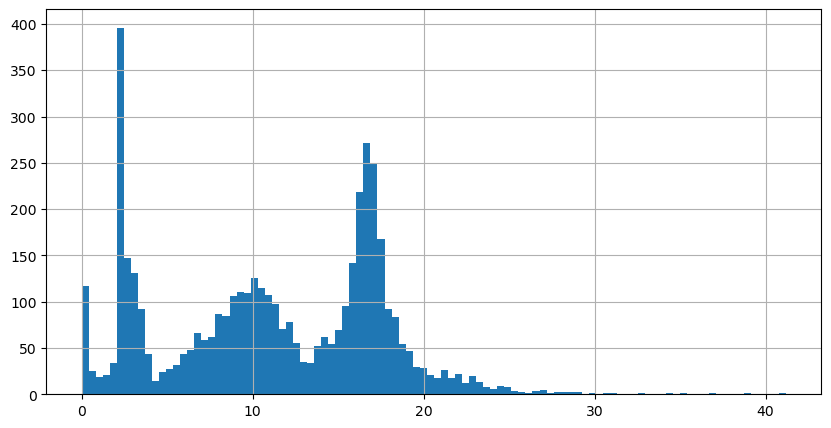

In [38]:
taxi_grouped_by_region['trip_distance'].hist(bins=100,figsize=(10,5))

<Axes: >

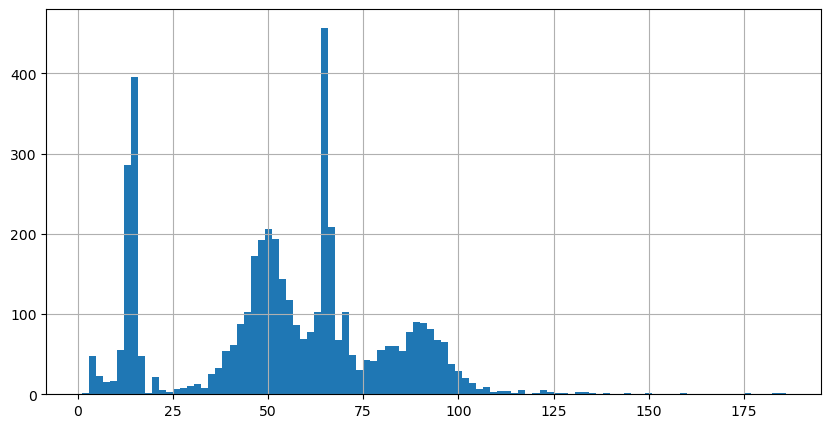

In [39]:
taxi_grouped_by_region['total_amount'].hist(bins=100,figsize=(10,5))

In [40]:
data_for_benchmark_model=taxi_grouped_by_region.copy()

In [41]:
categorical_features=['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features=categorical_features+['trip_distance']
target_feature=['total_amount']

In [42]:
from sklearn.model_selection import train_test_split
x_axis=data_for_benchmark_model[input_features]
y_axis=data_for_benchmark_model[target_feature]
x_axis=pd.get_dummies(x_axis)
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_axis,y_axis,test_size=0.33,random_state=42)

In [43]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=10)
tree.fit(x_train_b,y_train_b)

DecisionTreeRegressor(max_depth=10)

In [44]:
model_at_hand=tree
y_pred=model_at_hand.predict(x_test_b)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
print('mean absolute error= ',mean_absolute_error(y_test_b,y_pred))
print('mean squared error= ',mean_squared_error(y_test_b,y_pred))
print('root mean square error= ',sqrt(mean_squared_error(y_test_b,y_pred)))
print('r2= ',r2_score(y_test_b,y_pred))

mean absolute error=  3.9643162001653245
mean squared error=  69.67406213832312
root mean square error=  8.34709902530952
r2=  0.9024573386791713


<Axes: xlabel='true', ylabel='pred'>

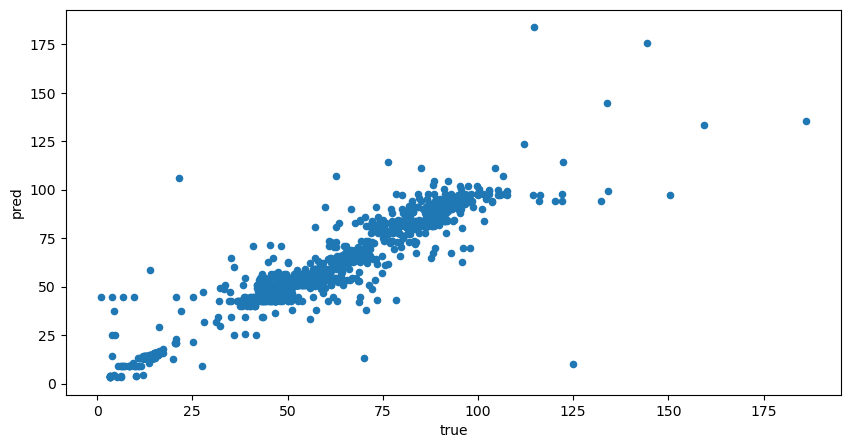

In [45]:
y_test_b = y_test_b.values
y_test_b = y_test_b.flatten()
data = {'true': y_test_b, 'pred': y_pred}
results = pd.DataFrame(data)
results.plot(kind='scatter', x='true', y='pred', figsize=(10, 5))

In [46]:
categorical_features=['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features=categorical_features
target_feature=['total_amount']

from sklearn.model_selection import train_test_split
x_axis=data_for_benchmark_model[input_features]
y_axis=data_for_benchmark_model[target_feature]
x_axis=pd.get_dummies(x_axis)
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_axis,y_axis,test_size=0.33,random_state=42)

from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=10)
tree.fit(x_train_b,y_train_b)

model_at_hand=tree
y_pred=model_at_hand.predict(x_test_b)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
print('mean absolute error= ',mean_absolute_error(y_test_b,y_pred))
print('mean squared error= ',mean_squared_error(y_test_b,y_pred))
print('root mean square error= ',sqrt(mean_squared_error(y_test_b,y_pred)))
print('r2= ',r2_score(y_test_b,y_pred))

mean absolute error=  6.928059902616054
mean squared error=  223.2573272127657
root mean square error=  14.941797991298293
r2=  0.6874430284763018


<Axes: xlabel='true', ylabel='pred'>

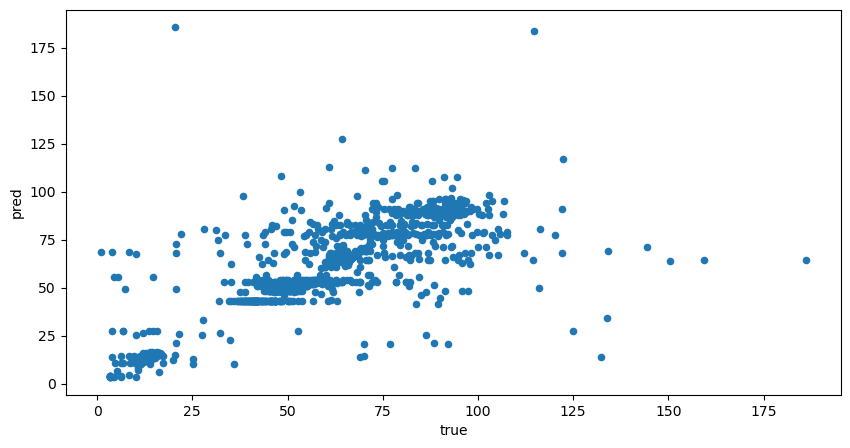

In [47]:
y_test_b=y_test_b.values
y_test_b=y_test_b.flatten()
data = {'true': y_test_b, 'pred': y_pred}
results = pd.DataFrame(data)
results.plot(kind='scatter', x='true', y='pred', figsize=(10, 5))

In [48]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction
0,1.0,2019-01-01,1,1,0,2.810215,15.501245,13256
1,1.0,2019-01-01,1,1,1,3.008797,15.880940,15258
2,1.0,2019-01-01,1,1,2,3.125909,15.789893,13035
3,1.0,2019-01-01,1,1,3,3.203513,15.493270,10292
4,1.0,2019-01-01,1,1,4,3.535103,16.105968,6686


In [49]:
data_with_new_feature=taxi_grouped_by_region.copy()

In [50]:
data_with_new_feature['transaction_weekday']=data_with_new_feature['transaction_date'].dt.weekday
data_with_new_feature['weekend']=data_with_new_feature['transaction_weekday'].apply (lambda x: True if x==5 or x==6 else False)

In [51]:
data_with_new_feature.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_weekday,weekend
0,1.0,2019-01-01,1,1,0,2.810215,15.501245,13256,1,False
1,1.0,2019-01-01,1,1,1,3.008797,15.880940,15258,1,False
2,1.0,2019-01-01,1,1,2,3.125909,15.789893,13035,1,False
3,1.0,2019-01-01,1,1,3,3.203513,15.493270,10292,1,False
4,1.0,2019-01-01,1,1,4,3.535103,16.105968,6686,1,False


In [52]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal=USFederalHolidayCalendar() 
holidays=cal.holidays(start='2018',end='2020').date
data_with_new_feature['is_holiday']=data_with_new_feature['transaction_date'].isin(holidays)

In [53]:
data_with_new_feature.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_weekday,weekend,is_holiday
0,1.0,2019-01-01,1,1,0,2.810215,15.501245,13256,1,False,True
1,1.0,2019-01-01,1,1,1,3.008797,15.880940,15258,1,False,True
2,1.0,2019-01-01,1,1,2,3.125909,15.789893,13035,1,False,True
3,1.0,2019-01-01,1,1,3,3.203513,15.493270,10292,1,False,True
4,1.0,2019-01-01,1,1,4,3.535103,16.105968,6686,1,False,True


In [54]:
zone_lookup=pd.read_csv(r'C:\Users\ASUS\Desktop\texi-analysis\data\taxi_zone_lookup.csv')
zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [55]:
zone_lookup.dtypes

LocationID       int64
Borough         object
Zone            object
service_zone    object
dtype: object

In [56]:
zone_lookup=zone_lookup[['LocationID','Borough']]
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [57]:
zone_lookup['Borough'].value_counts()

Borough
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Unknown           1
Name: count, dtype: int64

In [58]:
data_with_new_feature['PULocationID'] = pd.to_numeric(data_with_new_feature['PULocationID'], errors='coerce')

In [59]:
data_with_new_feature=data_with_new_feature.merge(zone_lookup,left_on='PULocationID',right_on='LocationID',how='left')
data_with_new_feature.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_weekday,weekend,is_holiday,LocationID,Borough
0,1.0,2019-01-01,1,1,0,2.810215,15.501245,13256,1,False,True,1.0,EWR
1,1.0,2019-01-01,1,1,1,3.008797,15.880940,15258,1,False,True,1.0,EWR
2,1.0,2019-01-01,1,1,2,3.125909,15.789893,13035,1,False,True,1.0,EWR
3,1.0,2019-01-01,1,1,3,3.203513,15.493270,10292,1,False,True,1.0,EWR
4,1.0,2019-01-01,1,1,4,3.535103,16.105968,6686,1,False,True,1.0,EWR


In [60]:
# frames = [data_with_new_feature,zone_lookup]
# result = pd.concat(frames)
# display(result)

In [61]:
data_with_new_feature['Borough'].value_counts()

Borough
Staten Island    933
EWR              744
Queens           744
Bronx            718
Manhattan        717
Name: count, dtype: int64

In [62]:
nyc_weather=pd.read_csv(r'C:\Users\ASUS\Desktop\texi-analysis\data\nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [63]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [64]:
nyc_weather['cloud cover'].value_counts()

cloud cover
70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: count, dtype: int64

In [65]:
nyc_weather['amount of precipitation'].value_counts()

amount of precipitation
Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0            

In [66]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [67]:
nyc_weather['amount of precipitation']=nyc_weather['amount of precipitation'].replace('Trace of precipitation',0.1)
nyc_weather['amount of precipitation']=nyc_weather['amount of precipitation'].astype(float)
nyc_weather['amount of precipitation'].interpolate(inplace=True)

In [68]:
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('70 – 80%.',0.7)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('100%.',1)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('50%.',0.5)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('20–30%.',0.3)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('no clouds',0)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.',1)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

In [69]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [70]:
nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])
nyc_weather['day']=nyc_weather['date and time'].dt.day
nyc_weather['month']=nyc_weather['date and time'].dt.month
nyc_weather['hour']=nyc_weather['date and time'].dt.hour

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34172\2040359130.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])


In [71]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,day,month,hour
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,31,12,22
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,31,12,19
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,31,12,16
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,31,12,13
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,31,12,10


In [72]:
nyc_weather.dtypes

date and time              datetime64[ns]
temperature                       float64
humidity                            int64
wind speed                          int64
cloud cover                       float64
amount of precipitation           float64
day                                 int32
month                               int32
hour                                int32
dtype: object

In [73]:
data_with_new_feature.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_weekday,weekend,is_holiday,LocationID,Borough
0,1.0,2019-01-01,1,1,0,2.810215,15.501245,13256,1,False,True,1.0,EWR
1,1.0,2019-01-01,1,1,1,3.008797,15.880940,15258,1,False,True,1.0,EWR
2,1.0,2019-01-01,1,1,2,3.125909,15.789893,13035,1,False,True,1.0,EWR
3,1.0,2019-01-01,1,1,3,3.203513,15.493270,10292,1,False,True,1.0,EWR
4,1.0,2019-01-01,1,1,4,3.535103,16.105968,6686,1,False,True,1.0,EWR


In [74]:
data_with_new_feature.dtypes

PULocationID                   float64
transaction_date        datetime64[ns]
transaction_month                int32
transaction_day                  int32
transaction_hour                 int32
trip_distance                  float64
total_amount                   float64
count_of_transaction             int64
transaction_weekday              int32
weekend                           bool
is_holiday                        bool
LocationID                     float64
Borough                         object
dtype: object

In [75]:
nyc_taxi_with_weather=data_with_new_feature.merge(nyc_weather,left_on=['transaction_month','transaction_day','transaction_hour'],right_on=['month','day','hour'],how="left")
print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(4552, 22)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_weekday,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,day,month,hour
0,1.0,2019-01-01,1,1,0,2.810215,15.501245,13256,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2019-01-01,1,1,1,3.008797,15.880940,15258,1,False,...,EWR,2019-01-01 01:00:00,8.3,97.0,0.0,1.0,29.0,1.0,1.0,1.0
2,1.0,2019-01-01,1,1,2,3.125909,15.789893,13035,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2019-01-01,1,1,3,3.203513,15.493270,10292,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2019-01-01,1,1,4,3.535103,16.105968,6686,1,False,...,EWR,2019-01-01 04:00:00,12.2,93.0,7.0,1.0,0.5,1.0,1.0,4.0


In [76]:
nyc_taxi_with_weather=nyc_taxi_with_weather.drop(['date and time','month','day','hour'],axis=1)

In [77]:
print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(4552, 18)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_weekday,weekend,is_holiday,LocationID,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1.0,2019-01-01,1,1,0,2.810215,15.501245,13256,1,False,True,1.0,EWR,NaN,NaN,NaN,NaN,NaN
1,1.0,2019-01-01,1,1,1,3.008797,15.880940,15258,1,False,True,1.0,EWR,8.3,97.0,0.0,1.0,29.0
2,1.0,2019-01-01,1,1,2,3.125909,15.789893,13035,1,False,True,1.0,EWR,NaN,NaN,NaN,NaN,NaN
3,1.0,2019-01-01,1,1,3,3.203513,15.493270,10292,1,False,True,1.0,EWR,NaN,NaN,NaN,NaN,NaN
4,1.0,2019-01-01,1,1,4,3.535103,16.105968,6686,1,False,True,1.0,EWR,12.2,93.0,7.0,1.0,0.5


In [78]:
nyc_taxi_with_weather.isna().sum()

PULocationID                696
transaction_date              0
transaction_month             0
transaction_day               0
transaction_hour              0
trip_distance                 0
total_amount                  0
count_of_transaction          0
transaction_weekday           0
weekend                       0
is_holiday                    0
LocationID                  696
Borough                     696
temperature                2912
humidity                   2912
wind speed                 2912
cloud cover                2912
amount of precipitation    2912
dtype: int64

In [79]:
print(nyc_taxi_with_weather.shape)

(4552, 18)


In [80]:
nyc_taxi_with_weather=nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [81]:
nyc_taxi_with_weather=nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather=nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34172\1064252051.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nyc_taxi_with_weather=nyc_taxi_with_weather.interpolate()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_34172\1064252051.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_taxi_with_weather=nyc_taxi_with_weather.fillna(method='bfill')


PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transaction       0
transaction_weekday        0
weekend                    0
is_holiday                 0
LocationID                 0
Borough                    1
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [82]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_weekday,weekend,is_holiday,LocationID,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1.0,2019-01-01,1,1,0,2.810215,15.501245,13256,1,False,True,1.0,EWR,8.3,97.0,0.0,1.0,29.0
1,2.0,2019-01-01,1,1,0,16.180625,65.178750,80,1,False,True,2.0,Queens,8.3,97.0,0.0,1.0,29.0
2,3.0,2019-01-01,1,1,0,3.983750,46.320000,8,1,False,True,3.0,Bronx,8.3,97.0,0.0,1.0,29.0
3,4.0,2019-01-01,1,1,0,19.890000,74.615000,4,1,False,True,4.0,Manhattan,8.3,97.0,0.0,1.0,29.0
4,5.0,2019-01-01,1,1,0,5.409107,63.491429,56,1,False,True,5.0,Staten Island,8.3,97.0,0.0,1.0,29.0


In [83]:
data_for_model=nyc_taxi_with_weather.copy()

In [84]:
categorical_features=['PULocationID','transaction_month','transaction_day','transaction_hour','transaction_weekday','weekend','is_holiday','Borough']
input_features=categorical_features+['temperature','humidity','wind speed','cloud cover','amount of precipitation']
target_feature='total_amount'

In [85]:
from sklearn.model_selection import train_test_split
x_axis=data_for_model[input_features]
y_axis=data_for_model[target_feature]
#one hot encoding
x_encode=pd.get_dummies(x_axis)
x_train,x_test,y_train,y_test=train_test_split(x_encode,y_axis,test_size=0.33,random_state=42)

In [86]:
print(x_train.shape)
print(y_train.shape)

(3049, 17)
(3049,)


In [87]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor(max_depth=10)
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [88]:
model_at_hand=decision_tree
y_pred=model_at_hand.predict(x_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
print('mean absolute error= ',mean_absolute_error(y_test,y_pred))
print('mean squared error= ',mean_squared_error(y_test,y_pred))
print('root mean square error= ',sqrt(mean_squared_error(y_test,y_pred)))
print('r2= ',r2_score(y_test,y_pred))

mean absolute error=  7.2193182322924665
mean squared error=  235.0657537531617
root mean square error=  15.331854217711623
r2=  0.6805507641542142


<Axes: xlabel='true', ylabel='pred'>

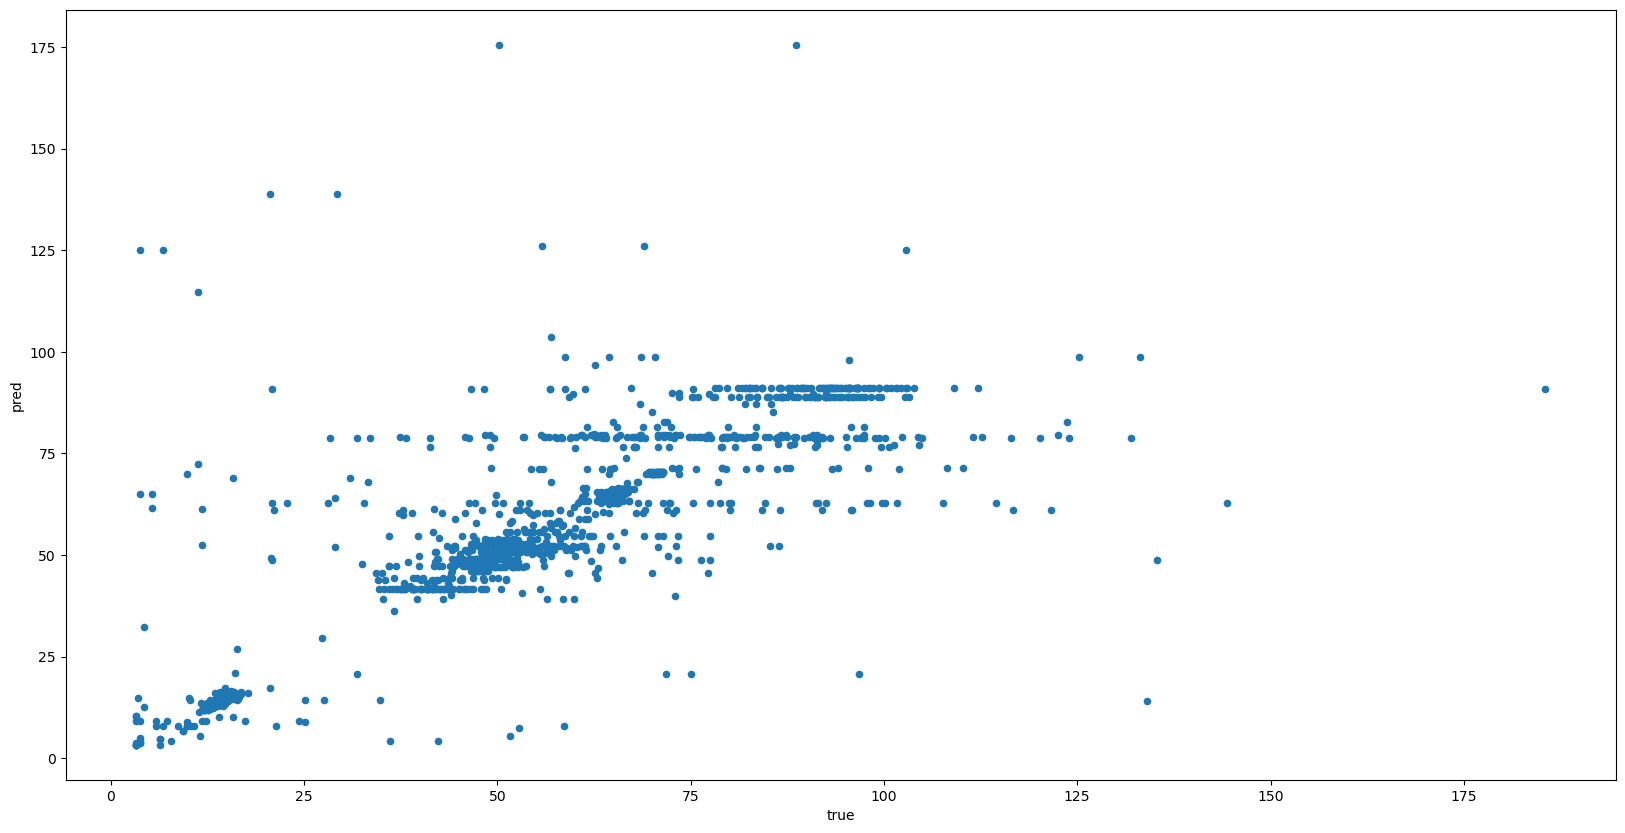

In [89]:
data={'true':y_test,'pred':y_pred}
result=pd.DataFrame(data)
result.plot(figsize=(20,10),kind="scatter",x='true',y='pred')

In [90]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [91]:
model_at_hand=random_forest
y_pred=model_at_hand.predict(x_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
print('mean absolute error= ',mean_absolute_error(y_test,y_pred))
print('mean squared error= ',mean_squared_error(y_test,y_pred))
print('root mean square error= ',sqrt(mean_squared_error(y_test,y_pred)))
print('r2= ',r2_score(y_test,y_pred))

mean absolute error=  6.7591032123487444
mean squared error=  168.33574887749623
root mean square error=  12.974426726352737
r2=  0.7712353863297665


<Axes: xlabel='true', ylabel='pred'>

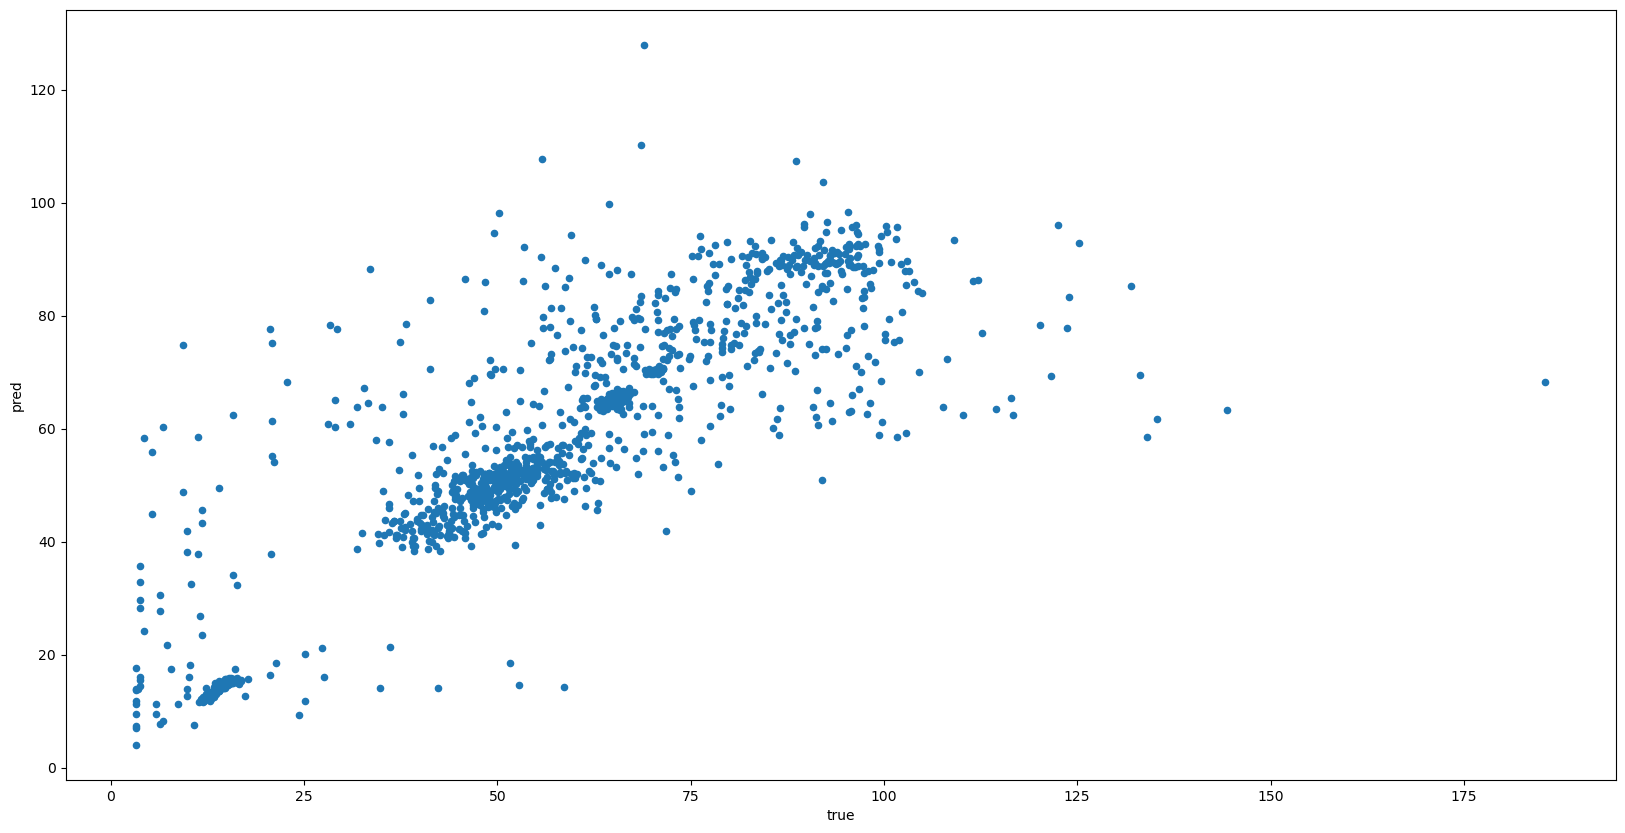

In [92]:
data={'true':y_test,'pred':y_pred}
result=pd.DataFrame(data)
result.plot(figsize=(20,10),kind="scatter",x='true',y='pred')

In [93]:
#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost=GradientBoostingRegressor()
gradient_boost.fit(x_train,y_train)

GradientBoostingRegressor()

In [94]:
model_at_hand=gradient_boost
y_pred=model_at_hand.predict(x_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
print('mean absolute error= ',mean_absolute_error(y_test,y_pred))
print('mean squared error= ',mean_squared_error(y_test,y_pred))
print('root mean square error= ',sqrt(mean_squared_error(y_test,y_pred)))
print('r2= ',r2_score(y_test,y_pred))

mean absolute error=  7.1004480968398225
mean squared error=  150.5765380578628
root mean square error=  12.270963208235235
r2=  0.7953697667530136


<Axes: xlabel='true', ylabel='pred'>

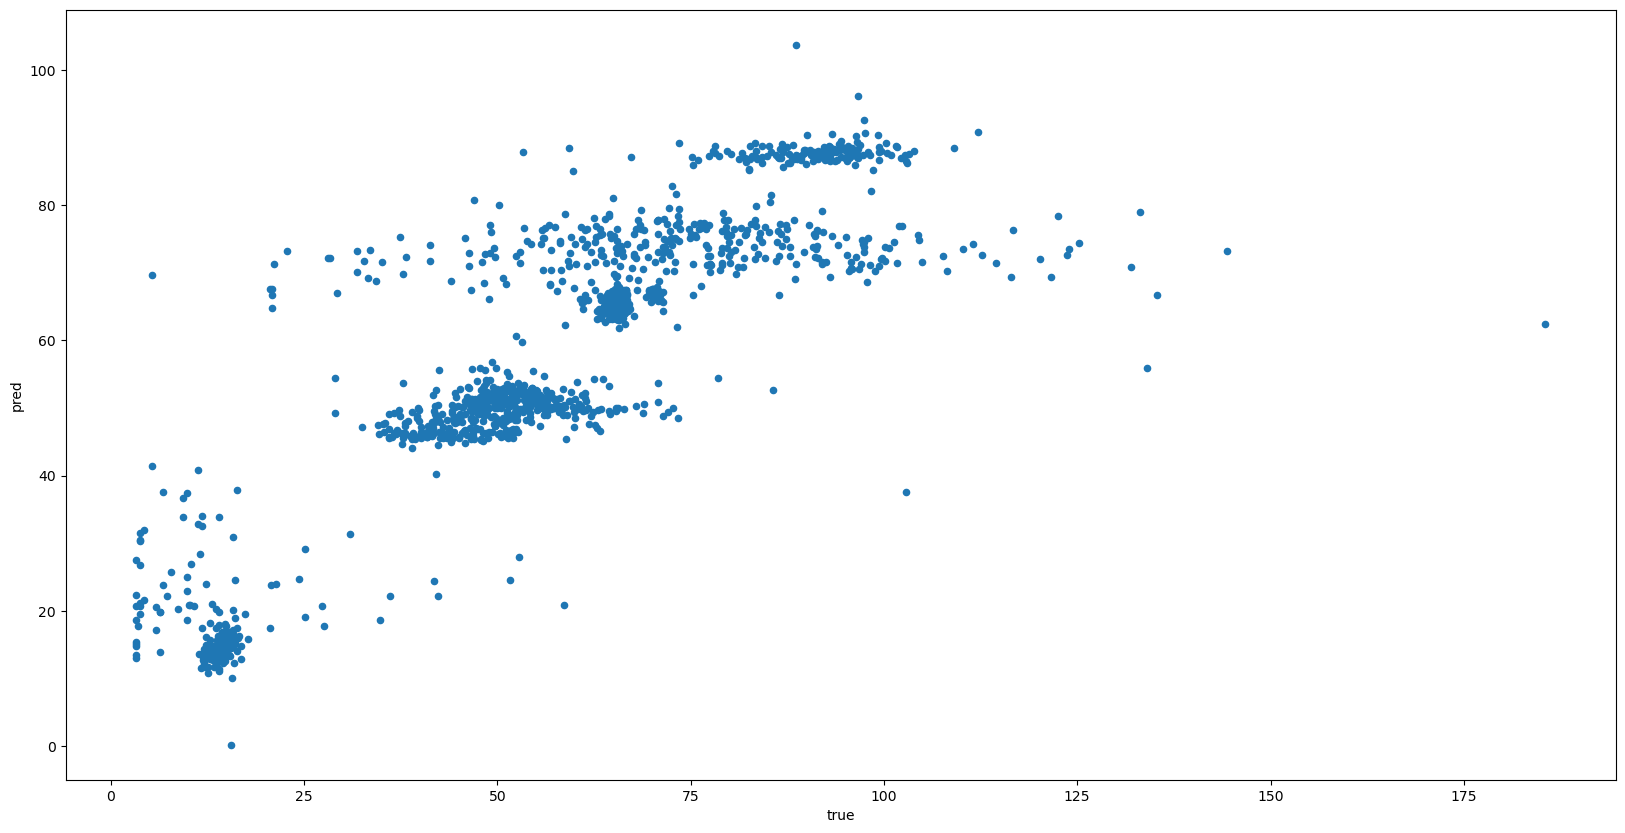

In [95]:
data={'true':y_test,'pred':y_pred}
result=pd.DataFrame(data)
result.plot(figsize=(20,10),kind="scatter",x='true',y='pred')

In [96]:
#(pd.Series(model_at_hand.feature_importances_, index=x_train.columns).nlargest(10).plot(kind='barh')) 